# AI Fall 00 - Computer Assignment 3

<div style="font-size: 16px;">
<b>Paria Khoshtab 810198387</b>
<hr>
</div>

<span style='color: #3973ac; font-size: 23px'><b>
Goal
</b></span>

 - Getting more familiar with machine learning methods by Sickit-Learn library
 - Analyzing data
 - Preprocessing methods
 - Feature extraction from text
 - Decision tree and random forrest models and optimization of these models

<span style='color: #3973ac; font-size: 23px'><b>
Brief Description
</b></span>

In this problem we are given a dataset, which is containing a number of movies and TV series available on the Netflix site
and Amazon. During this project, we are going to predict the type of film column.

<span style='color: #3973ac; font-size: 23px'><b>
Implementation
</b></span>

First we have to import necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

In the code below, we read the dataset and store it in a dataframe.

In [2]:
df = pd.read_csv("dataset.csv")
df.head(5)

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<span style='color: #3973ac; font-size: 25px'><b>
Phase Zero: Data analysis
</b></span>

### Question 1

In [3]:
df.describe()

,release_year
count,11059.000000
mean,2014.209603
std,8.959517
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


### Question 2

In [5]:
print('Percentage of missing data: ')
print(df.isna().sum()/len(df)*100)

Percentage of missing data: 
type             0.000000
title            0.000000
cast            12.342888
country         24.369292
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64


<span style='color: #3973ac; font-size: 25px'><b>
Phase One: Preprocessing
</b> </span>

### Question 1

 - <b>Removing Rows With Missing Values:</b>
        In this case, we remove all the rows which contain missing values. 
        This can easily be done with the dropna() function.<br></li>
 - <b>Filling out Missing Values: </b>
    In this case, we have several options to assign appropriate values. The most common ones are column Mean,
    Median or Mode of the data. Also we can fill NA with a constant value.

We use the method of filling the missing data with mode, because columns with missing values are categorical.
Also it might not be the best approach to
remove the rows containing missing values if such rows are abundant. They might contain valuable data
in other columns and we don't want to skew the data towards an inaccurate state.
As we saw in the previous section, a large percentage of the cast and country attributes is NA, so removing rows with missing 
values might lead to data loss.


Note that we fill the missing values of the cast column with the mode of all the actors in this column.(after splitting)

In [6]:
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['cast'].fillna(df['cast'].str.split(', ').explode().dropna().mode()[0], inplace=True)

### Question 2

 - <b>Normalization:</b>
        Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and
        1. It is also known as Min-Max scaling. The new point is calculated as:
            $\frac{X - X_(min)}{X_(max) - X_(min)}$</li>
 - <b>Standardization:</b>
    Standardization or Z-Score Normalization is the transformation of features by subtracting from mean and dividing
    by standard deviation. In this case the mean of the attribute becomes zero and the resultant distribution has a unit standard 
    deviation.
    The new point is calculated as: $\frac{X - mean}{std}$</li>

We do not use any scaling techniques like Normalization or Standardization, because tree-based algorithms are fairly insensitive
to the scale of the features. A decision tree is only splitting a node based on a single feature.
This split on a feature is not influenced by other features.
So, there is virtually no effect of the remaining features on the split. 
This is what makes them invariant to the scale of the features!<br>
E.g., without any scaling if it asks the model whether 5 > X > -5,   
then, scaling it will ask the model whether 1 > X > -1.


### Question 3

 - <b>Label Encoding:</b>
        This approach is very simple and it involves converting each value in a column to a number. <br></li>
 - <b>One-Hot Encoding: </b>
    In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false)
    value to the column.</li>

We use the method of Label Encoding because we have many unique values in our category columns like country, 
this can cause the number of columns to expand greatly in the method of One-Hot Encoding.


<b>Column `type` Label Encoding</b>

In [7]:
labelencoder = preprocessing.LabelEncoder()
df['type'] = labelencoder.fit_transform(df['type'])
df.head(5)

,type,title,cast,country,release_year,listed_in,description
0,0,Dick Johnson Is Dead,Anupam Kher,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,1,Jailbirds New Orleans,Anupam Kher,United States,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Question 4

 1. Each category value(after splitting values) is converted into a new column and assigned a 1 or 0 
    (notation for true/false) value to the column.

 2. We add a fixed number of columns (3 for genres and 2 for countries) to the data frame and replace the corresponding value 
    in the series data (after splitting) in each column. If the number of added columns is more than the number of values in each row, we fill
the rest of the columns with the value of the first column.
 
We use the second method because we have many unique values in our category columns like country, this can cause
the number of columns to expand greatly in the first method.


<b>Column `listed_in` Label Encoding</b>

First we, add 3 columns to separate `listed_in` column series data using the second method mentioned above.

In [8]:
genres = df['listed_in'].str.split(', ', n = 4, expand = True)
df['genre1']= genres[0]
df['genre2']= genres[1]
df['genre3']= genres[2]
df.genre2.fillna(df.genre1, inplace=True)
df.genre3.fillna(df.genre1, inplace=True)
df = df.drop(['listed_in'], axis=1)
df.head(5)

,type,title,cast,country,release_year,description,genre1,genre2,genre3
0,0,Dick Johnson Is Dead,Anupam Kher,United States,2020,"As her father nears the end of his life, filmm...",Documentaries,Documentaries,Documentaries
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"After crossing paths at a party, a Cape Town t...",International TV Shows,TV Dramas,TV Mysteries
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,To protect his family from a powerful drug lor...,Crime TV Shows,International TV Shows,TV Action & Adventure
3,1,Jailbirds New Orleans,Anupam Kher,United States,2021,"Feuds, flirtations and toilet talk go down amo...",Docuseries,Reality TV,Docuseries
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,In a city of coaching centers known to train I...,International TV Shows,Romantic TV Shows,TV Comedies


Then, we label `genre1`, `genre2`, and `genre` columns using the Label Encoding method, mentioned above.

In [9]:
df['genre1'] = labelencoder.fit_transform(df['genre1'])
df['genre2'] = labelencoder.fit_transform(df['genre2'])
df['genre3'] = labelencoder.fit_transform(df['genre3'])
df.head(5)

,type,title,cast,country,release_year,description,genre1,genre2,genre3
0,0,Dick Johnson Is Dead,Anupam Kher,United States,2020,"As her father nears the end of his life, filmm...",22,19,20
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"After crossing paths at a party, a Cape Town t...",37,69,79
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,To protect his family from a powerful drug lor...,20,37,75
3,1,Jailbirds New Orleans,Anupam Kher,United States,2021,"Feuds, flirtations and toilet talk go down amo...",24,51,22
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,In a city of coaching centers known to train I...,37,54,76


<b>Column `country` Label Encoding</b>

First we, add 2 columns to separate `country` column series data using the second method mentioned above.

In [10]:
countries = df['country'].str.split(', ', n = 3, expand = True)
df["country1"]= countries[0]
df["country2"]= countries[1]
df.country2.fillna(df.country1, inplace=True)
df = df.drop(['country'], axis=1)
df.head(5)

,type,title,cast,release_year,description,genre1,genre2,genre3,country1,country2
0,0,Dick Johnson Is Dead,Anupam Kher,2020,"As her father nears the end of his life, filmm...",22,19,20,United States,United States
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,"After crossing paths at a party, a Cape Town t...",37,69,79,South Africa,South Africa
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,To protect his family from a powerful drug lor...,20,37,75,United States,United States
3,1,Jailbirds New Orleans,Anupam Kher,2021,"Feuds, flirtations and toilet talk go down amo...",24,51,22,United States,United States
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,In a city of coaching centers known to train I...,37,54,76,India,India


Then, we label `country1` and `country2` columns using the Label Encoding method, mentioned above.

In [11]:
df['country1'] = labelencoder.fit_transform(df['country1'])
df['country2'] = labelencoder.fit_transform(df['country2'])
df.head(5)

,type,title,cast,release_year,description,genre1,genre2,genre3,country1,country2
0,0,Dick Johnson Is Dead,Anupam Kher,2020,"As her father nears the end of his life, filmm...",22,19,20,82,96
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021,"After crossing paths at a party, a Cape Town t...",37,69,79,68,81
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021,To protect his family from a powerful drug lor...,20,37,75,82,96
3,1,Jailbirds New Orleans,Anupam Kher,2021,"Feuds, flirtations and toilet talk go down amo...",24,51,22,82,96
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021,In a city of coaching centers known to train I...,37,54,76,30,37


<span style='color: #3973ac; font-size: 23px'><b>
Feature Extraction from Text
</b></span>

**Count Vectorizer** and **TF-IDF** are both methods for converting text data into vectors, because as far as we know, computers 
can only understand numerical data, while natural language data, for computers, are just text strings without any numerical 
or statistical information.<br>

 - <b>Count Vectorizer:</b>
        Count Vectorizer is a way to convert a given set of strings into a frequency representation. <br></li>
 - <b>TF-IDF: </b>
    TF-IDF means Term Frequency - Inverse Document Frequency. This is a statistic that is based on the frequency of a word
    in the text but it also provides a numerical representation of how important a word is for statistical analysis.

Large number of features can cause poor performance for machine learning algorithms.
By increasing number of features in the feature data set, we may not always have an 
increase in performance, because there may be a case, were some features are irrelevant or redundant given the ones 
already extracted, so this may lead to an non-optimal predictive model in terms of performance and also overfitting.
<br><br>
We use Count Vectorizer method for extracting features from the text columns(title, description, and cast) in the dataframe.


<b>Feature extraction from `cast`</b>

In [12]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '), max_features=10)
vectorized = vectorizer.fit_transform(df['cast'])
df = df.join(pd.DataFrame(vectorized.toarray(), columns=vectorizer.get_feature_names()))
df = df.drop(['cast'], axis=1)
df.head(5)

,type,title,release_year,description,genre1,genre2,genre3,country1,country2,akshay kumar,anupam kher,fred tatasciore,julie tejwani,naseeruddin shah,om puri,rupa bhimani,shah rukh khan,takahiro sakurai,yuki kaji
0,0,Dick Johnson Is Dead,2020,"As her father nears the end of his life, filmm...",22,19,20,82,96,0,1,0,0,0,0,0,0,0,0
1,1,Blood & Water,2021,"After crossing paths at a party, a Cape Town t...",37,69,79,68,81,0,0,0,0,0,0,0,0,0,0
2,1,Ganglands,2021,To protect his family from a powerful drug lor...,20,37,75,82,96,0,0,0,0,0,0,0,0,0,0
3,1,Jailbirds New Orleans,2021,"Feuds, flirtations and toilet talk go down amo...",24,51,22,82,96,0,1,0,0,0,0,0,0,0,0
4,1,Kota Factory,2021,In a city of coaching centers known to train I...,37,54,76,30,37,0,0,0,0,0,0,0,0,0,0


<b>Feature extraction from `title` and `description`</b>

We merge columns `title` and `description` and save them in a new column called `title_description`.

In [13]:
df['title_description'] = df['title'] + ' ' + df['description']
df = df.drop(['title', 'description'], axis=1)
vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_features=50)
vectorized = vectorizer.fit_transform(df['title_description'])
df = df.join(pd.DataFrame(vectorized.toarray(), columns=vectorizer.get_feature_names()))
df = df.drop(['title_description'], axis=1)
df.head(5)

,type,release_year,genre1,genre2,genre3,country1,country2,akshay kumar,anupam kher,fred tatasciore,...,time,town,true,war,way,woman,world,year,years,young
0,0,2020,22,19,20,82,96,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2021,37,69,79,68,81,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,2021,20,37,75,82,96,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,2021,24,51,22,82,96,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2021,37,54,76,30,37,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<span style='color: #3973ac; font-size: 25px'><b>
Investigate the relationships between features
</b> </span>

**Information Gain**, or IG for short, measures the reduction in entropy or surprise by splitting a dataset according to
a given value of a random variable.
Information gain is calculated by comparing the entropy of the dataset before and after a transformation.<br>
**Mutual information** calculates the statistical dependence between two variables and is the name given to information
gain when applied to variable selection.<br>
So we can use `mutual_info_classif` function to calculate the IG.


In [14]:
IG = mutual_info_classif(df.drop(['type'], axis = 1), df['type'])
IG = pd.Series(IG)
IG.index = df.drop(['type'], axis=1).columns
IG = IG.sort_values(ascending = False)
print(IG)

genre2              0.686503
genre3              0.684932
genre1              0.684517
country1            0.075325
country2            0.073006
                      ...   
school              0.000000
save                0.000000
om puri             0.000000
takahiro sakurai    0.000000
high                0.000000
Length: 66, dtype: float64


 Now we plot the Information Gain based on features.

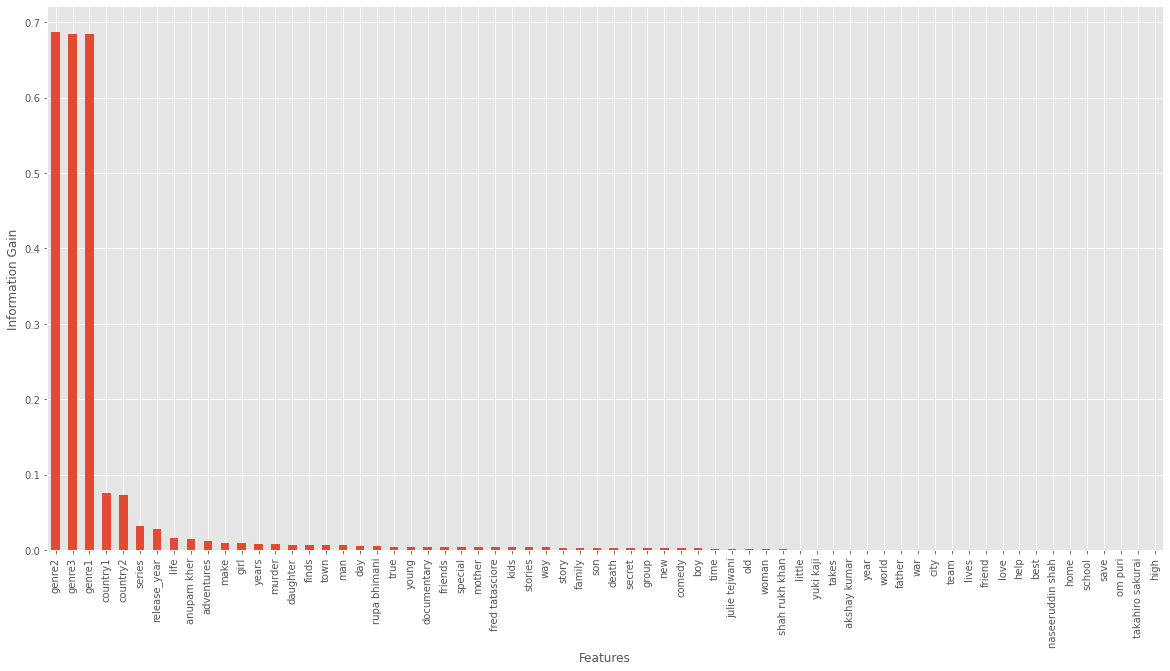

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Information Gain')
IG.plot.bar()
plt.show()

### Plot Analysis

As can be seen in the plot above, the genre features have very high Information Gain  because the words `TV` or `MOVIE` are usually
seen inside each genre. Therefore, since the correlation between the genre column and the target column is very high, 
the accuracy of the prediction model will be very high and overfitting won't occur.

<span style='color: #3973ac; font-size: 25px'><b>
Phase Two: Goal Prediction and Model Optimization
</b> </span>

We use the `train_test_split` function to divide the data into two parts, train and test.

In [16]:
X = df.drop(['type'], axis = 1)
y = df['type']
train_features, test_features, train_type, test_type = train_test_split(X, y, test_size = 0.2)

`print_model_info` function shown below, prints accuracy and confusion matrices of train and test datasets using confusion_matrix
and accuracy_score functions.

In [17]:
def print_model_info(model):
    print('Train confusion matrix:\n', confusion_matrix(train_type, model.predict(train_features)), '\n')
    print('Train accuracy:', accuracy_score(train_type, model.predict(train_features)), '\n')
    print('Test confusion matrix:\n', confusion_matrix(test_type, model.predict(test_features)), '\n')
    print('Test accuracy:', accuracy_score(test_type, model.predict(test_features)), '\n')

### Before optimization

In [18]:
DTC = tree.DecisionTreeClassifier()
DTC = DTC.fit(train_features, train_type)
max_depth = DTC.tree_.max_depth

In [19]:
print_model_info(DTC)

Train confusion matrix:
 [[4888    0]
 [   0 3959]] 

Train accuracy: 1.0 

Test confusion matrix:
 [[1233   10]
 [   7  962]] 

Test accuracy: 0.9923146473779385 



As we expected, the accuracy of our model is very high due to the high correlation between the genre column and the target
column.<br>
Accuracy: $\frac{TP + TN}{TP + TN + FP + FN}$

### After optizimization

- <b>max_depth: </b>
        The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves
        contain less than min_samples_split samples. (default=None)</li>
- <b>min_samples_split: </b>
    The minimum number of samples required to split an internal node. (default=2)</li>


In [20]:
hyper_params = {'max_depth': list(range(1, max_depth)), 'min_samples_split': list(range(2, max_depth))}
grid_search_cv = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = hyper_params, scoring = 'accuracy', cv = 3, verbose = 1)
grid_search_cv = grid_search_cv.fit(train_features, train_type)
print(grid_search_cv.best_estimator_)

Fitting 3 folds for each of 272 candidates, totalling 816 fits
DecisionTreeClassifier(max_depth=17)


## Question 1

Our train-test ratio is 80:20, because if we search the Internet for the best train-test ratio, 
the first answer to pop will be 80:20. This means we use 80% of the observations for training and the rest for testing. 
If the dataset is relatively small (n < 10,000), 70:30 would be a suitable choice.<br>        

### Train/Test Ratio = 98:2

When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. 
This is called **Overfitting**, which leads to good performance on the train data and poor generliazation to test data.<br>
In this case we will have high accuracy due to the high correlation between the genre column and the target column,
but if this high correlation did not exist, we expected overfitting to occur and the accuracy of our model on the test data
would decrease.

In [21]:
train_features, test_features, train_type, test_type = train_test_split(X, y, test_size = 0.02)
grid_search_cv = grid_search_cv.fit(train_features, train_type)
print_model_info(grid_search_cv)

Fitting 3 folds for each of 272 candidates, totalling 816 fits
Train confusion matrix:
 [[5999    0]
 [   5 4833]] 

Train accuracy: 0.9995386176986251 

Test confusion matrix:
 [[130   2]
 [  2  88]] 

Test accuracy: 0.9819819819819819 



### Train/Test Ratio = 40:60

When a model gets trained with little data, our model or the algorithm does not fit the data well enough. This is called
**Underfitting**, which leads to Poor performance on the training data and poor generalization to test data.
In this case we will have high accuracy due to the high correlation between the genre column and the target column,
but if this high correlation did not exist, we expected overfitting to occur and the accuracy of our model on the test 
data would decrease.

In [22]:
train_features, test_features, train_type, test_type = train_test_split(X, y, test_size = 0.6)
grid_search_cv = grid_search_cv.fit(train_features, train_type)
print_model_info(grid_search_cv)

Fitting 3 folds for each of 272 candidates, totalling 816 fits
Train confusion matrix:
 [[2416    6]
 [  18 1983]] 

Train accuracy: 0.9945738186751074 

Test confusion matrix:
 [[3675   34]
 [  50 2877]] 

Test accuracy: 0.9873417721518988 



## Question 2

If we reduce the `max_depth` too much, the accuracy of our model will decrease to 0.75, but the more we increase the `max_depth`
to reach its maximum value, the accuracy of our model will increase to 1.


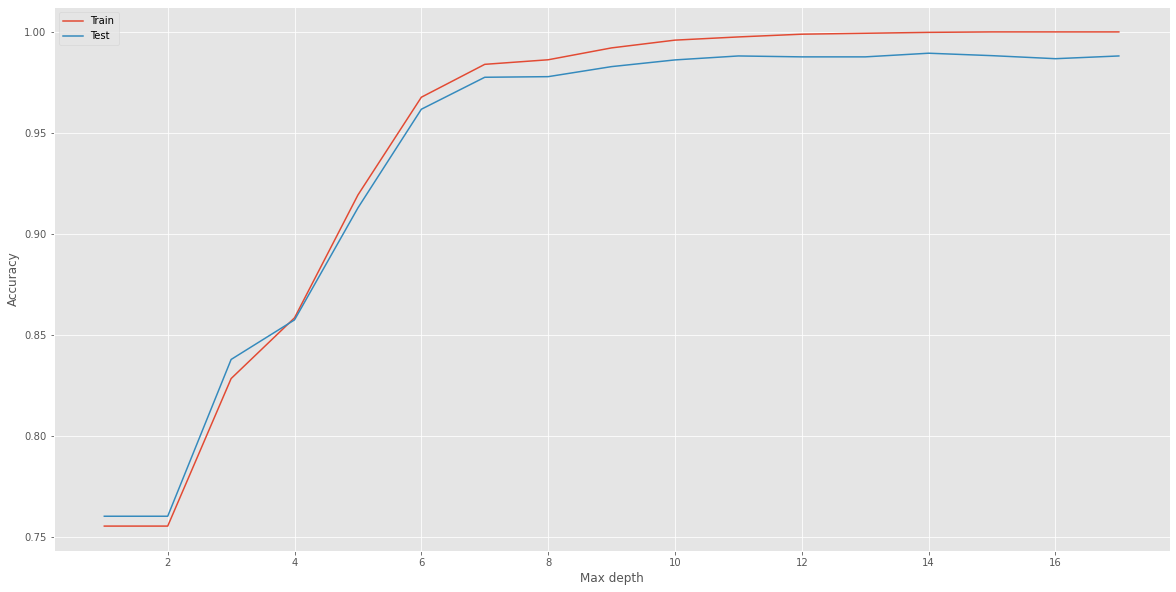

In [23]:
depth = list(range(1, max_depth))

train_acc = []
test_acc = []

for d in depth:
    model = tree.DecisionTreeClassifier(max_depth = d)
    model.fit(train_features, train_type)
    train_acc.append(model.score(train_features, train_type))
    test_acc.append(model.score(test_features, test_type))
    
plt.style.use('ggplot')
plt.figure(figsize=(20, 10)) 
plt.plot(depth, train_acc, label = 'Train')
plt.plot(depth, test_acc, label = 'Test')
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
DTC = tree.DecisionTreeClassifier(max_depth = 1)
DTC.fit(train_features, train_type)
print_model_info(DTC)

Train confusion matrix:
 [[1935  487]
 [ 595 1406]] 

Train accuracy: 0.7553696586027583 

Test confusion matrix:
 [[2908  801]
 [ 790 2137]] 

Test accuracy: 0.7602471368294154 



In [25]:
DTC = tree.DecisionTreeClassifier(max_depth = max_depth // 2)
DTC.fit(train_features, train_type)
print_model_info(DTC)

Train confusion matrix:
 [[2418    4]
 [  32 1969]] 

Train accuracy: 0.9918607280126611 

Test confusion matrix:
 [[3673   36]
 [  80 2847]] 

Test accuracy: 0.9825195901145268 



In [26]:
DTC = tree.DecisionTreeClassifier(max_depth = max_depth)
DTC.fit(train_features, train_type)
print_model_info(DTC)

Train confusion matrix:
 [[2422    0]
 [   0 2001]] 

Train accuracy: 1.0 

Test confusion matrix:
 [[3659   50]
 [  42 2885]] 

Test accuracy: 0.9861362266425557 



From the above diagram and confusion matrices we can conclude that the closer the `max_depth` is to the maximum value, 
the better our model learns and the higher the accuracy.


<span style='color: #3973ac; font-size: 25px'><b>
Phase Three: Prediction Using Random Forest
</b> </span>

## Hyperparameters

- <b>n_estimators:</b>
    The number of trees in the forest (default: 100)</li>
- <b>max_depth</b>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves
contain less than `min_samples_split` samples (default: None)

In [27]:
RFC = RandomForestClassifier() 
RFC.fit(train_features, train_type)
test_pred = RFC.predict(test_features)
print("Accuracy: ", metrics.accuracy_score(test_type, test_pred))

Accuracy:  0.989451476793249


We plot accuracy based on  `n_estimators` and `max_depth` features.


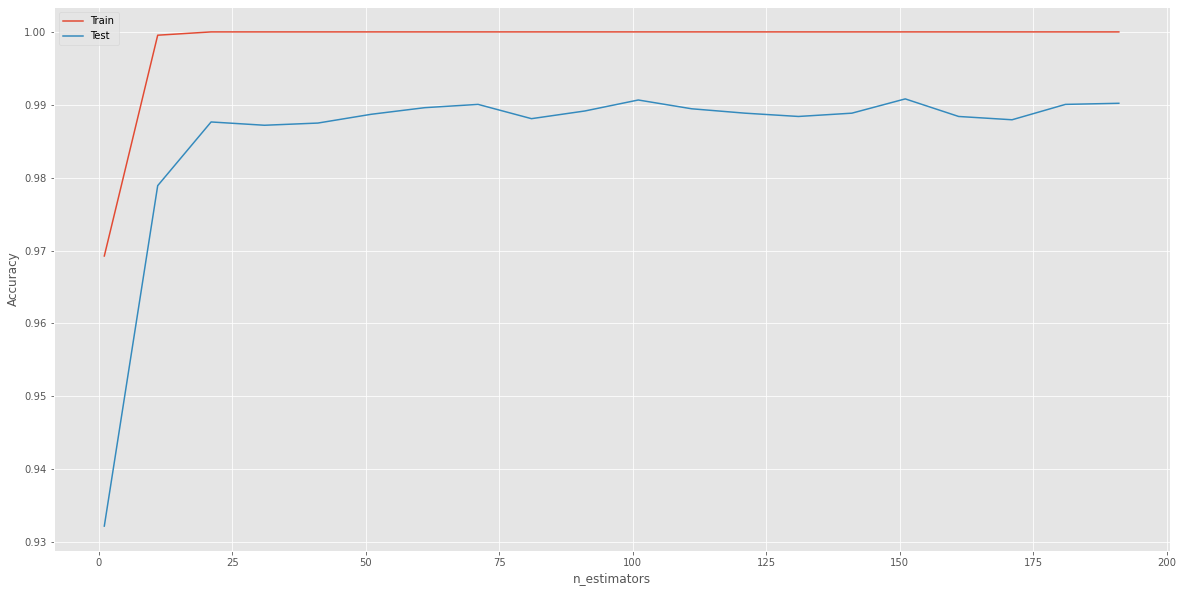

In [28]:
n_estimators = list(range(1, 200, 10))

train_acc = []
test_acc = []

for estimator in n_estimators:
    model = RandomForestClassifier(n_estimators = estimator) 
    model.fit(train_features, train_type)
    train_acc.append(model.score(train_features, train_type))
    test_acc.append(model.score(test_features, test_type))
    
plt.style.use('ggplot')
plt.figure(figsize=(20, 10)) 
plt.plot(n_estimators, train_acc, label = 'Train')
plt.plot(n_estimators, test_acc, label = 'Test')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

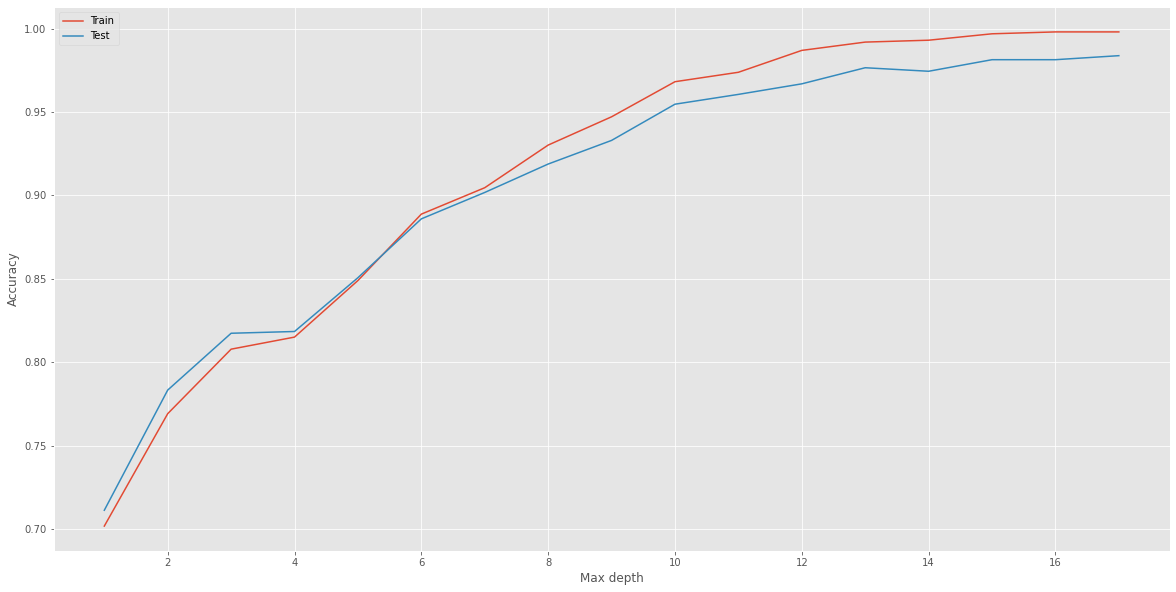

In [29]:
depth = list(range(1, max_depth))

train_acc = []
test_acc = []

for d in depth:
    model = RandomForestClassifier(max_depth = d)
    model.fit(train_features, train_type)
    train_acc.append(model.score(train_features, train_type))
    test_acc.append(model.score(test_features, test_type))

plt.style.use('ggplot')
plt.figure(figsize=(20, 10)) 
plt.plot(depth, train_acc, label = 'Train')
plt.plot(depth, test_acc, label = 'Test')
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

According to the diagrams above, as we expected, the more the `n_estimator` and `max_depth` parameters increase, 
the better our model will learn and the more accurate it will be.<br>
The more uncorrelated trees in our forest, the closer their individual errors get to
averaging out.<br>
`max_depth` has the consequence that our Random Forest can no more fit the training data as closely, 
and is consequently more stable. It has lower variance, giving our model lower error. 

## Random Forest vs. Decision Tree

As we expected, again due to the high correlation between the genre column and the target column,
the random model works well and has high accuracy similar to Decision Tree.<br><br>
If our model is too simple and has very few parameters then it may have high bias and low variance. On the other
hand if our model has large number of parameters then it’s going to have high variance and low bias.<br>
An algorithm like Decision Tree has low bias but high variance, because it can easily change as small change in input 
variable. In general, it does not generalize the pattern well. It leads to overfitting.<br>
In Random Forests the bias of the full model is equivalent to the bias of a single decision tree 
(which itself has high variance). By creating many of these trees, in effect a "forest", and then
averaging them the variance of the final model can be greatly reduced over that of a single tree.

<span style='color: #3973ac; font-size: 23px'><b>
Conclusion
</b></span>

Random Forest is suitable for situations when we have a large dataset, and interpretability is not a major concern.<br>
Decision trees are much easier to interpret and understand. Since a random forest combines multiple decision trees,
it becomes more difficult to interpret.
Also, Random Forest has a higher training time than a single decision tree.
As we increase the number of trees in a random forest, the time taken to train each of them also increases.
That can often be crucial when we’re working with a tight deadline in a machine learning project.<br>
In my opinion despite, instability and dependency on a particular set of features, decision trees are really helpful because 
they are easier to interpret and faster to train.